# Credit Card Fraud Detection – Analysis

In [15]:
import os
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras import losses
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from keras import backend as K
from keras.callbacks import Callback
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv("/Users/cynthiamasetto/Documents/Data-Science-Project/1. Credit Card Fraud Detection/creditcard.csv")


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Because the data has been analysed before there's no need to clean the data

In [8]:
corr=np.array(data.corr())
corr=np.around(corr[-1],decimals=2)
corr=pd.DataFrame(corr,index=data.columns)
corr

,0
Time,-0.01
V1,-0.10
V2,0.09
V3,-0.19
V4,0.13
V5,-0.09
V6,-0.04
V7,-0.19
V8,0.02
V9,-0.10


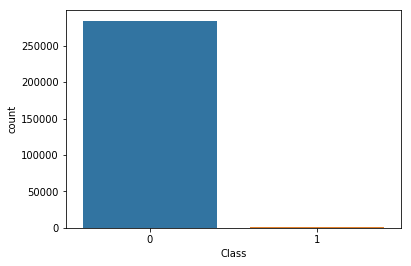

In [9]:
sns.countplot(data['Class'])

In [16]:
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Time[data.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


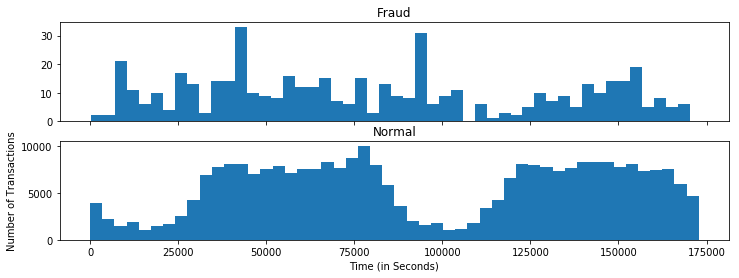

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. Number of normal transactions is much smaller during the weee hours of the morning (between 1 to 5am). This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

In [22]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


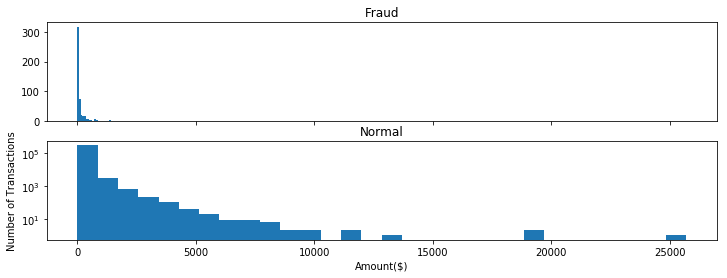

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

# Prediction with feature reduction / autoencoder and classificaiton
First autoencoders are used to do classification

In [25]:
train = data

Starting with 20%

In [48]:
train_df, test_df = train_test_split(train, test_size=0.2)
train_df.shape, test_df.shape


((227845, 31), (56962, 31))

In [49]:
train_df['Class'].value_counts()

0    227439
1       406
Name: Class, dtype: int64

In [50]:
train_df['Class'].value_counts(normalize = True)

0    0.998218
1    0.001782
Name: Class, dtype: float64

In [51]:
test_df['Class'].value_counts()

0    56876
1       86
Name: Class, dtype: int64

In [52]:
test_df['Class'].value_counts(normalize = True)

0    0.99849
1    0.00151
Name: Class, dtype: float64

In [53]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51940,45202.0,-0.459177,0.920533,1.258215,0.879785,0.570106,-0.249421,0.543576,-0.092498,-0.573241,...,-0.139833,-0.459559,-0.075873,-0.475239,-0.335212,-0.523316,0.018770,0.194187,9.99,0
232303,147121.0,2.068793,0.174211,-1.656012,0.439923,0.379689,-0.936627,0.197876,-0.252042,0.463058,...,-0.356318,-0.912488,0.351061,0.642950,-0.266337,0.164786,-0.061439,-0.029150,1.29,0
2691,2229.0,-0.398550,2.445267,-2.323382,1.410081,0.518936,-1.787224,0.598556,0.141484,0.222765,...,-0.218415,-0.147198,0.148194,0.154825,-0.341655,-0.437058,0.387004,-0.046934,0.89,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
19113,30028.0,-0.350524,1.044913,1.277172,0.075781,-0.041257,-1.024099,0.621869,-0.012426,-0.236497,...,-0.275512,-0.774532,-0.004463,0.306215,-0.195785,0.075391,0.239075,0.096267,0.89,0


In [54]:
x = train_df.drop(['Class'], axis=1)

In [55]:
y = train_df['Class']

In [68]:
sc = MinMaxScaler(feature_range=[0,1])
x = sc.fit_transform(x)

In [82]:
## input layer
input_layer = Input(shape=(30,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(30)(decode_layer3)

model = Model(input_layer, output_layer)

In [70]:
x_test = test_df.drop(['Class'], axis=1)
y_test = test_df['Class']
x_test = sc.fit_transform(x_test)

In [72]:
from keras.callbacks import EarlyStopping

In [76]:
x.shape, x_test.shape, y.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [80]:
x = x.reshape((len(x),np.prod(x.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
x.shape , x_test.shape

((227845, 30), (56962, 30))

In [84]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x, x, epochs=20, batch_size=100, validation_data=(x_test, x_test), callbacks=[early_stopping])



Train on 227845 samples, validate on 56962 samples
Epoch 1/20
227845/227845 [==============================] - 279s 1ms/step - loss: 0.0015 - val_loss: 0.0249
Epoch 2/20
227845/227845 [==============================] - 264s 1ms/step - loss: 3.7687e-04 - val_loss: 0.0245
Epoch 3/20
227845/227845 [==============================] - 288s 1ms/step - loss: 2.6366e-04 - val_loss: 0.0238
Epoch 4/20
227845/227845 [==============================] - 283s 1ms/step - loss: 2.0535e-04 - val_loss: 0.0243
Epoch 5/20
227845/227845 [==============================] - 286s 1ms/step - loss: 1.6455e-04 - val_loss: 0.0259
Epoch 6/20
227845/227845 [==============================] - 250s 1ms/step - loss: 1.4471e-04 - val_loss: 0.0257
Epoch 7/20
227845/227845 [==============================] - 242s 1ms/step - loss: 1.3173e-04 - val_loss: 0.0244
Epoch 8/20
227845/227845 [==============================] - 251s 1ms/step - loss: 1.2219e-04 - val_loss: 0.0239
Epoch 9/20
227845/227845 [==============================]

In [98]:
perdict = model.predict(x_test)
perdict

array([[0.3451235 , 0.8448976 , 0.6725789 , ..., 0.63590354, 0.26528454,
        0.07051836],
       [0.33346504, 0.8261598 , 0.6442122 , ..., 0.6304812 , 0.25639042,
        0.03434086],
       [0.82496196, 0.93319565, 0.7299106 , ..., 0.62235856, 0.24860615,
        0.03175858],
       ...,
       [0.738706  , 0.93604594, 0.76356035, ..., 0.6582426 , 0.25618258,
        0.00760449],
       [0.3286989 , 0.87431633, 0.76692754, ..., 0.63981164, 0.25198102,
        0.01697295],
       [0.351125  , 0.8620529 , 0.7055384 , ..., 0.6425852 , 0.2603586 ,
        0.03194048]], dtype=float32)

In [96]:
perdict.shape, x_test.shape

((56962, 30), (56962, 30))